# Best approximation

The result of census of the population of Switzerland between 1900 and 2010 (in thousands) is summarized in the following table:

|	year	|	population	|
|-----------|---------------|
|	1900	|	3315	|
|	1910	|	3753	|
|	1920	|	3880	|
|	1930	|	4066	|
|	1941	|	4266	|
|	1950	|	4715	|
|	1960	|	5429	|
|	1970	|	6270	|
|	1980	|	6366	|
|	1990	|	6874	|
|	2000	|	7288	|
|	2010	|	7783	|


* Is it possible to estimate the number of inhabitants of Switzerland
during the year when there has not been census, for example in 1945
and 1975?

* Is it possible to predict the number of inhabitants of Switzerland in
2020?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
year = np.array([1900, 1910, 1920, 1930, 1941, 1950, 1960, 1970, 1980, 1990, 2000, 2010])
population = np.array([3315, 3753, 3880, 4066, 4266, 4715, 5429, 6270, 6366, 6874, 7288, 7783])

We could try with interpolation; noting that we have many points we need a high degree interpolant

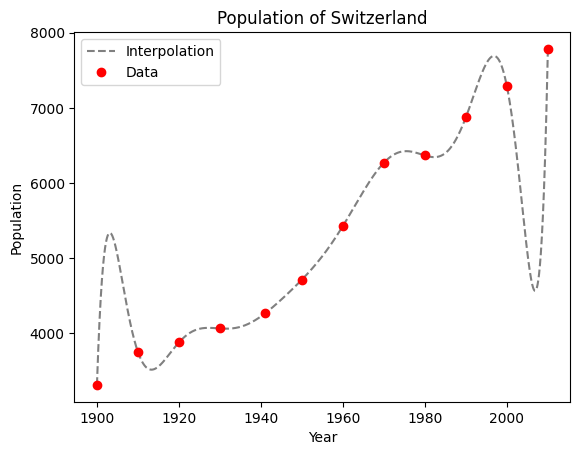

In [3]:
from interpolation import lagrange_interp

# Interpolate the population data using Lagrange interpolation
# and plot the result
x = np.arange(year[0], year[-1], 0.01)
y = lagrange_interp(year, population, x)

fig, ax = plt.subplots()
ax.plot(x, y, label='Interpolation', color='gray', linestyle='--')
ax.plot(year, population, 'ro', label='Data')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Population of Switzerland')
ax.legend()
plt.show()

Clearly, there are some issues with the interpolation. The large oscillations are not representative of the data.

# Approximation by least squares

Another approach to best approximate discrete data is that known as approximation by _least squares_.

Given $n+1$ data points $\{x_i,y_i\}_{i=0}^n$, we fix a function space $V_m$ of finite dimension $m+1$ with $m<n$ and we want to determine $f_m \in V_m$ such that 
$$
\sum_{i=0}^{n}\left[ y_i - f_m(x_i) \right]^2 \leq \sum_{i=0}^{n}\left[ y_i - g_m(x_i) \right]^2,\quad \forall g_m \in V_m.
$$

Having equipped $V_m$ with a basis $\{\phi_0,\phi_1,\ldots,\phi_m\}$, the above is equivalent to finding $(c_0^*,c_1^*,\ldots,c_m^*) \in \mathbb{R}^{m+1}$ such that 
$$
\sum_{i=0}^{n}\left[ y_i - \sum_{j=0}^m c_j^* \phi_j(x_i) \right]^2 \leq \sum_{i=0}^{n}\left[ y_i - \sum_{j=0}^m c_j \phi_j(x_i) \right]^2,\quad \forall (c_0,c_1,\ldots,c_m) \in \mathbb{R}^{m+1}.
$$

Having defined the matrix 
$$
B = 
\begin{bmatrix}
\phi_0(x_1)	& \phi_1(x_1)	& \cdots	& \phi_m(x_1)	\\
\phi_0(x_2)	& \phi_1(x_2)	& \cdots	& \phi_m(x_2)	\\
\vdots		& \vdots		& 			& \vdots		\\
\phi_0(x_n)	& \phi_1(x_n)	& \cdots 	& \phi_m(x_n)	
\end{bmatrix} \in \mathbb{R}^{(n+1)\times (m+1)},
$$
the above problem can be written as a minimization problem for the functional $\Phi(c_0,\ldots,c_m)$
$$
\min_{c \in \mathbb{R}^{m+1}} \Phi(c_0,\ldots,c_m),\quad \Phi(c_0,\ldots,c_m) = \Vert y - A c \Vert^2
$$

A necessary condition for minimimality is of course that 
$$
\frac{\partial \Phi(c)}{\partial c_k} \Bigg\vert_{c=c^*} = 0,\quad \forall k=0,\ldots,m,
$$
which in turns gives the following linear condition
$$
B^T B c^* = B^T y,
$$
known as _system of normal equations_.

## Example

Let us reconsider the previous example and find the best __quadratic__ fit for the data by least squares

[[ 5.01596699e+05]
 [-5.49899802e+02]
 [ 1.51387713e-01]]


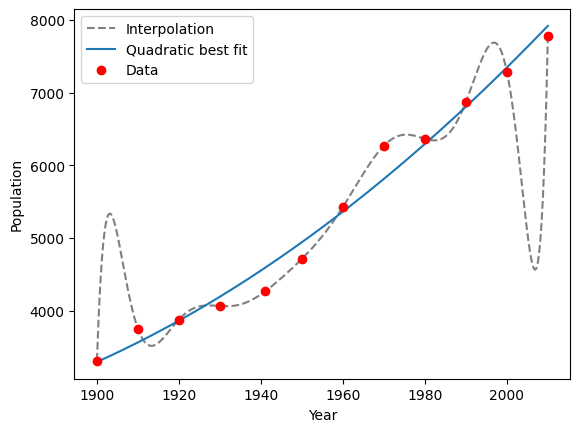

In [4]:
n = len(year) # Number of data points

# Create the matrix B
B = np.matrix([np.ones(n), year, year**2]).T

# Calculate the coefficients
coeff = np.linalg.solve(B.T@B, B.T@np.matrix(population).T)
print(coeff)

poly = lambda x : coeff[0, 0] + coeff[1, 0]*x + coeff[2, 0]*x**2 

fig, ax = plt.subplots()
ax.plot(x, lagrange_interp(year, population, x), label='Interpolation', color='gray', linestyle='--')
ax.plot(x, poly(x), label='Quadratic best fit')
ax.plot(year, population, 'ro', label='Data')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend()	
plt.show()

Now try with order 3

[[ 2.68023533e+07]
 [-4.09237713e+04]
 [ 2.08066454e+01]
 [-3.52175353e-03]]


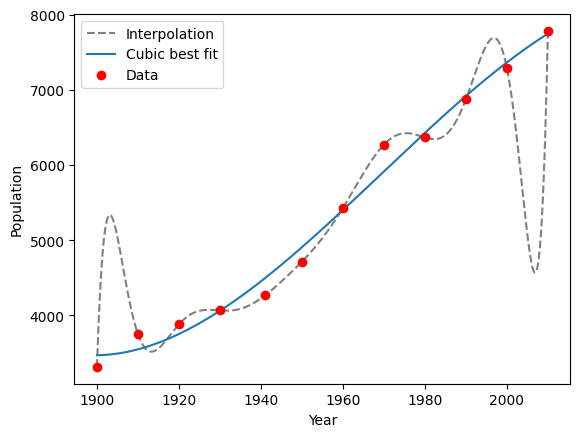

In [6]:
# complete here

n = len(year) # Number of data points

# Create the matrix B
B2 = np.matrix([np.ones(n), year, year**2, year**3]).T

# Calculate the coefficients
coeff = np.linalg.solve(B2.T@B2, B2.T@np.matrix(population).T)
print(coeff)

poly = lambda x : coeff[0, 0] + coeff[1, 0]*x + coeff[2, 0]*x**2 + coeff[3, 0]*x**3

fig, ax = plt.subplots()
ax.plot(x, lagrange_interp(year, population, x), label='Interpolation', color='gray', linestyle='--')
ax.plot(x, poly(x), label='Cubic best fit')
ax.plot(year, population, 'ro', label='Data')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend()	
plt.show()

## Comparison
Let's generalize to every degree

In [7]:
def best_fit(x, y, degree, xq):
	
	assert len(x) == len(y)
	assert degree > 0
	assert degree < len(x)
	n = len(x)

	x = np.float64(x)
	y = np.float64(y)
	xq = np.float64(xq)

	B = np.matrix([x**i for i in range(degree+1)]).T
	BT = B.T
	coeff = np.linalg.solve(BT*B, BT*np.matrix(y).T)
	coeff = list(coeff.flat)
	return sum([coeff[i]*xq**i for i in range(degree+1)])

In [9]:
np.polyfit?

Signature:       np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Call signature:  np.polyfit(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function polyfit at 0x0000018D1F501940>
File:            c:\users\giovanni\appdata\local\programs\python\python313\lib\site-packages\numpy\lib\_polynomial_impl.py
Docstring:      
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
method is recommended for new code as it is more stable numerically.

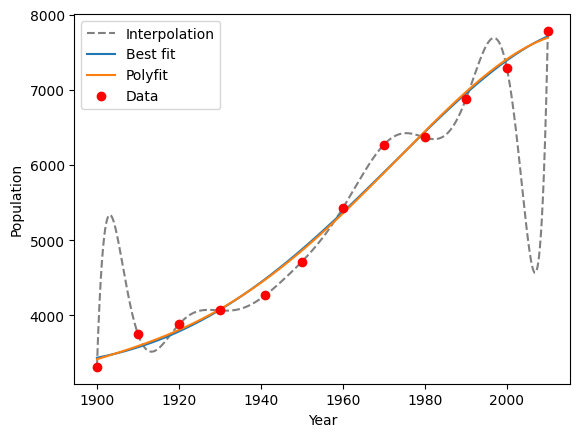

In [8]:
## Compare with np.polyfit
deg = 4

fig, ax = plt.subplots()
ax.plot(x, lagrange_interp(year, population, x), label='Interpolation', color='gray', linestyle='--')
ax.plot(x, best_fit(year, population, deg, x), label='Best fit')
ax.plot(x,np.polyval(np.polyfit(year, population, deg), x), label='Polyfit')
ax.plot(year, population, 'ro', label='Data')
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.legend()	
plt.show()

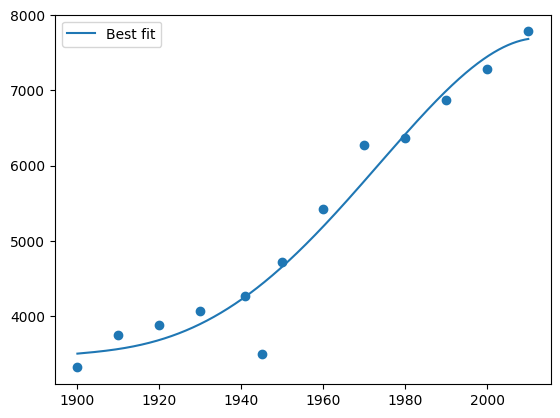

In [14]:
# let's try to add one outlayer
year_n = np.concatenate([year[:5], np.array([1945]), year[5:]])
population_n = np.concatenate([population[:5], np.array([3500]), population[5:]])

plt.scatter(year_n, population_n)
# plt.plot(x, lagrange_interp(year_n, population_n, x), label="Interpolation", color="gray")
plt.plot(x, best_fit(year_n, population_n, deg, x), label="Best fit")
plt.legend()
plt.show()